In [142]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3-ap-southeast-2.amazonaws.com/www.cryptoknowmics.com/crypto/wp-content/uploads/2019/11/jobss.jpg", width=1024, height=478)

## Description

<ul>
<li>The job market is hard enough to navigate without having to worry about some posting turning out to be a scam—or even just a dead end.</li>
<li>The project focuses on predicting which job descriptions are fraudulent or real using text data and meta data features.</li>
<li>Focuses on identifying key traits/features of job descriptions which are fraudulent in nature.</li>
<li>The main audience of this project will be the students and job- seekers looking for any job opportunities such as: internships, part- time, full-time jobs.</li>
<li>The project has a data of 18K job descriptions out of which about 800 are fake.</li>
</ul>

### Team Members:
<ul>
    <li>Uma Sai Madhuri Jetty</li>
    <li>Sahithi Priya Gutta</li>
    <li>Ankita Kumari</li>
    <li>Ashesh Shahi</li>
</ul>

### Importing all the required libraries

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [144]:
data = pd.read_csv("fake_job_postings.csv")

### Preparing and visiualizing the Data

In [145]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [147]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Lets find the missing values in the data 

In [148]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

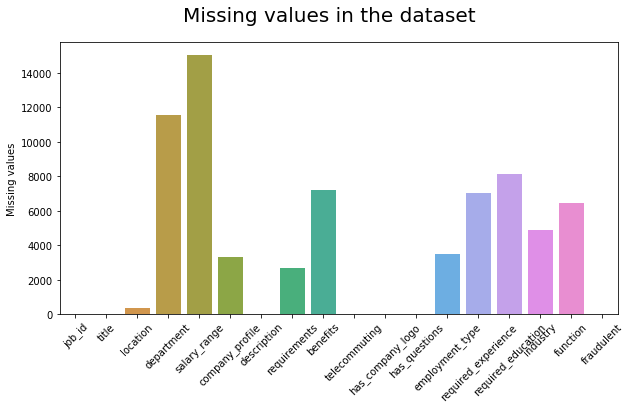

In [149]:
nullvalues = data.isnull().sum()
plt.figure(figsize = (10,5))
sns.barplot(nullvalues.index, nullvalues)
plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values')
plt.xticks(rotation = '45')
plt.show()

As we can see that there are missing values/null values in the dataset which needs to be fixed. Before fixing lest findout the number of categorical and number of numerical variables in the dataset.

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


We see that there are 5 numerical and 13 categorical variables. 

In [151]:
data['location'] = data['location'].fillna('Remote')

In [152]:
data.isnull().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [153]:
data['employment_type'] = data['employment_type'].fillna('Unavailable')
data['required_experience'] = data['required_experience'].fillna('Unavailable')
data['required_education'] = data['required_education'].fillna('Unavailable')

In [154]:
data.isnull().sum()

job_id                     0
title                      0
location                   0
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type            0
required_experience        0
required_education         0
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [155]:
# Dropping the column as more than 3/4th values are missing
data = data.drop('salary_range',axis=1)

In [156]:
# Replacing the missing values in department with other as department is needed and can't be removed
data['department'] = data['department'].fillna(value='other')